In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GmGM import GmGM
from GmGM.synthetic import PrecMatGenerator, DatasetGenerator
from GmGM.synthetic import PrecMatErdosRenyiGilbert
from GmGM.synthetic import measure_prec_recall, plot_prec_recall

Note: I think in this notebook, precision/recall have been flipped...  Keep that in mind while reading!  Am working on a fix.

## Main Takeaways

TODO: This section

Ignore the tests with n_comps, I am unsatisfied with the method of generating relevant graphs.

# Basic Experiments

## Experiment One
Synthetic multi-omics dataset, where true graphs are sparse.

We see that when we only have one sample (common real-world case), it's better to use col-weighted rowwise thresholding.  However, if we have a few samples (here `num_samples=10`), overall thresholding does better.

We also see that shared axes ("cell" here) get better results.

In [2]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


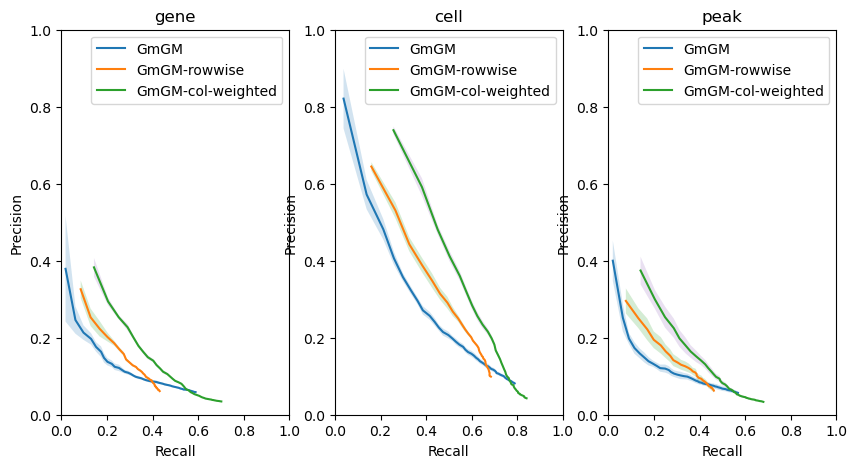

In [3]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


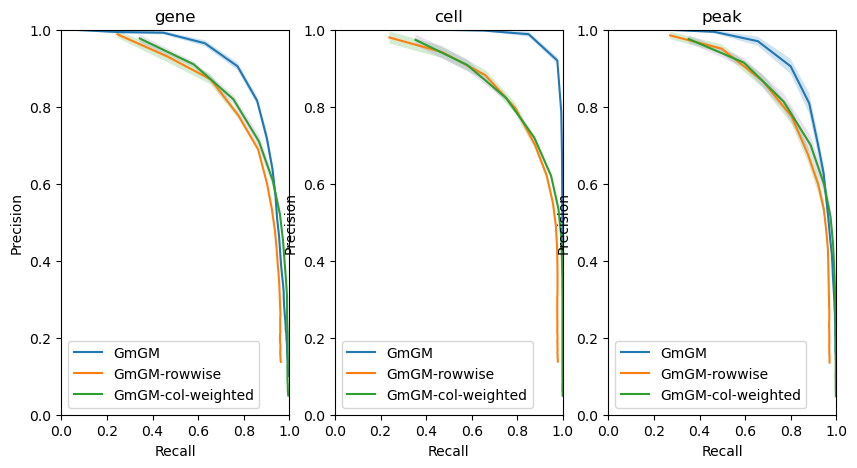

In [4]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Two

When is the principal components approximation okay?

On synthetic data I am not able to make it look okay!  I know from experiments that this approximation is able to work on real data, so more work needs to be done on figuring out why it does not work on synthetic data.

In [5]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

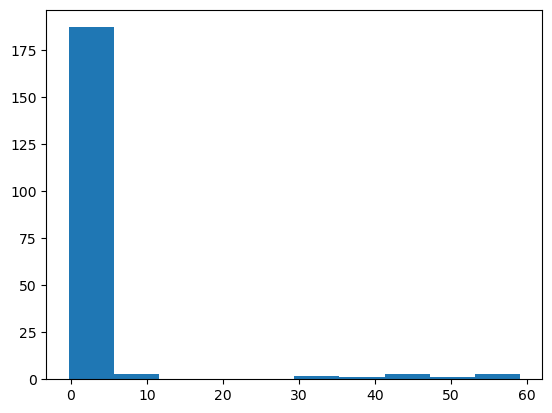

In [6]:
generator.generate()
plt.hist(np.linalg.eigh(generator.Psis["cell"])[0])
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


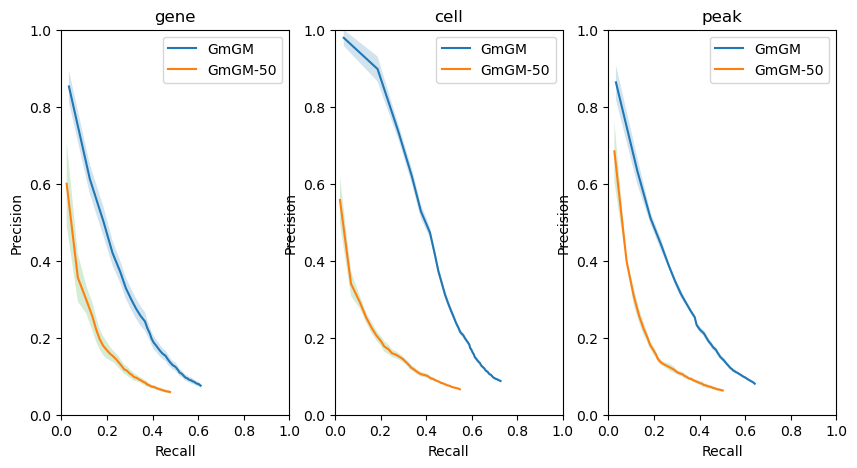

In [7]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


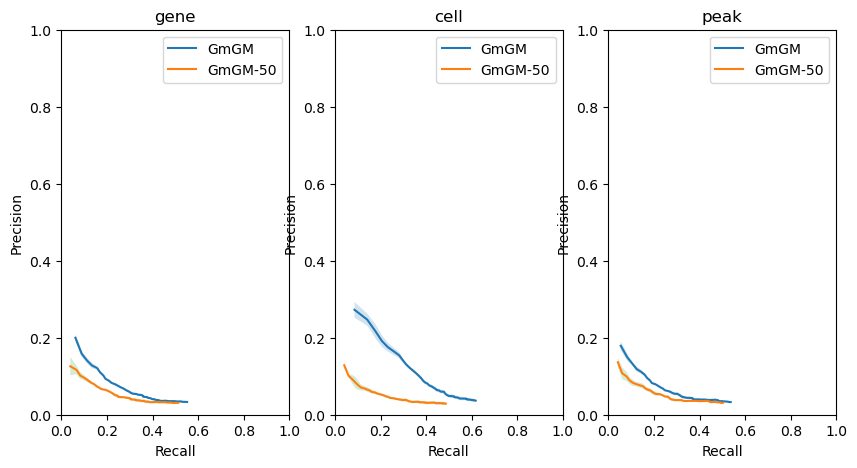

In [8]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


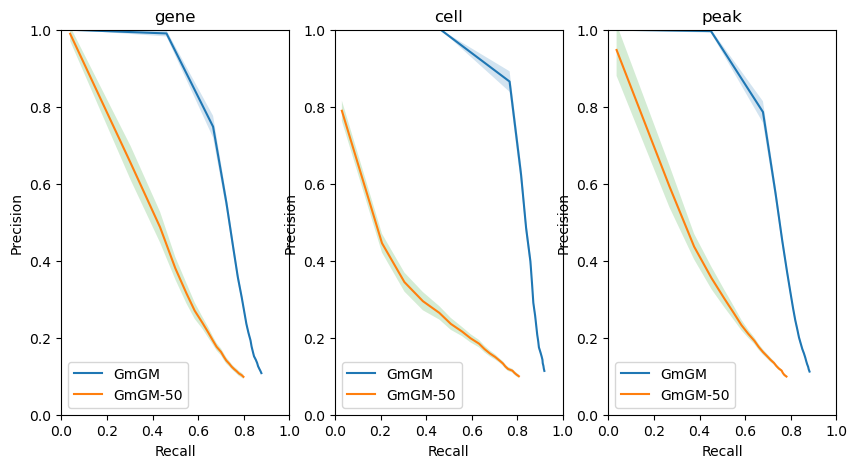

In [10]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


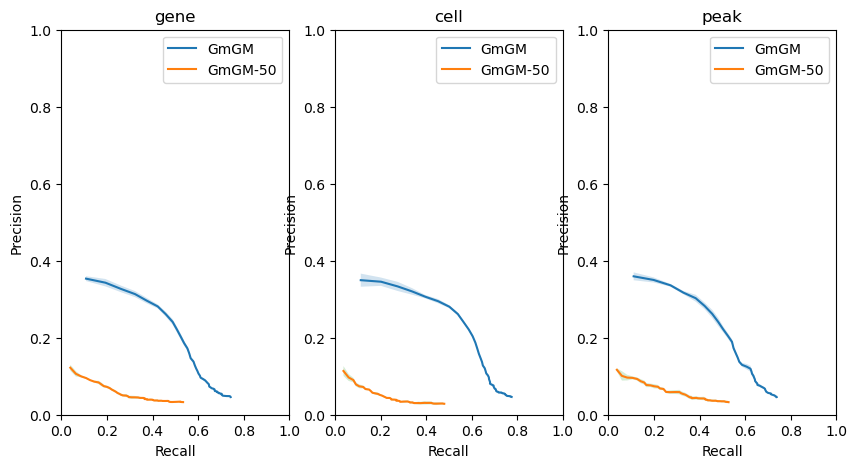

In [11]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Three: Tensor Data

Best to do "overall" thresholding, and we get near-perfect performance with only one sample.  This makes sense as in tensor data, we have "many more" samples (an AxBxC tensor has BC data points for each element along the A axis, compared to an AxB matrix which only has B data points).

In [12]:
generator = DatasetGenerator(
    structure={
        "tensor": ("A", "B", "C"),
    },
    generator={
        "A": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "B": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "C": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "A": 50,
        "B": 50,
        "C": 50
    },
)
generator

<DatasetGenerator, structure=
	tensor: ('', 'A', 'B', 'C')
size=
	A: 50
	B: 50
	C: 50
generator=
	A: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	B: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	C: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	tensor: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


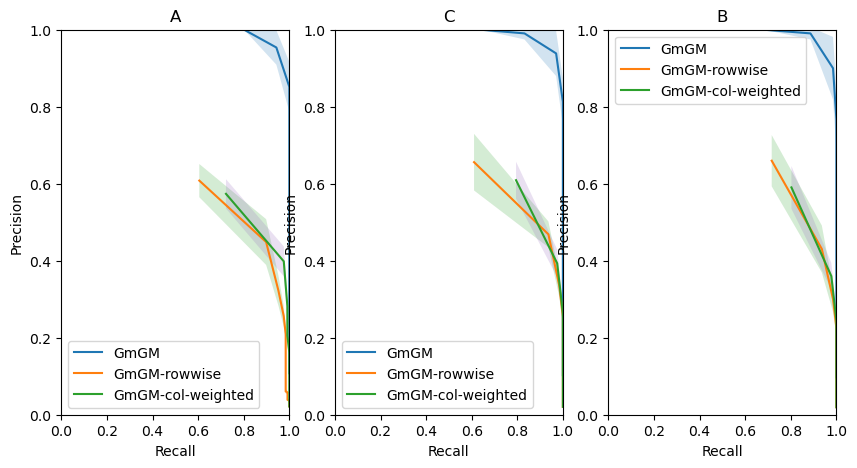

In [13]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


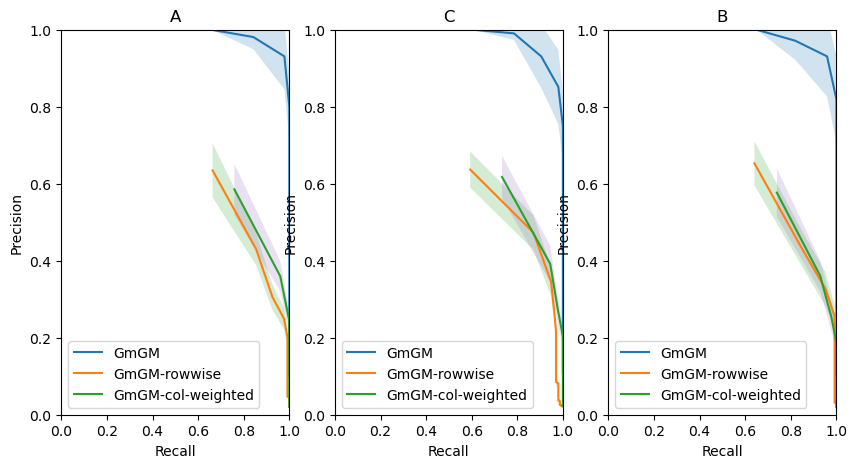

In [14]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Four: Tensor Data, n_comps << size

In [19]:
generator = DatasetGenerator(
    structure={
        "tensor": ("A", "B", "C"),
    },
    generator={
        "A": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "B": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "C": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "A": 50,
        "B": 50,
        "C": 50
    },
)
generator

<DatasetGenerator, structure=
	tensor: ('', 'A', 'B', 'C')
size=
	A: 50
	B: 50
	C: 50
generator=
	A: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	B: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	C: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	tensor: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


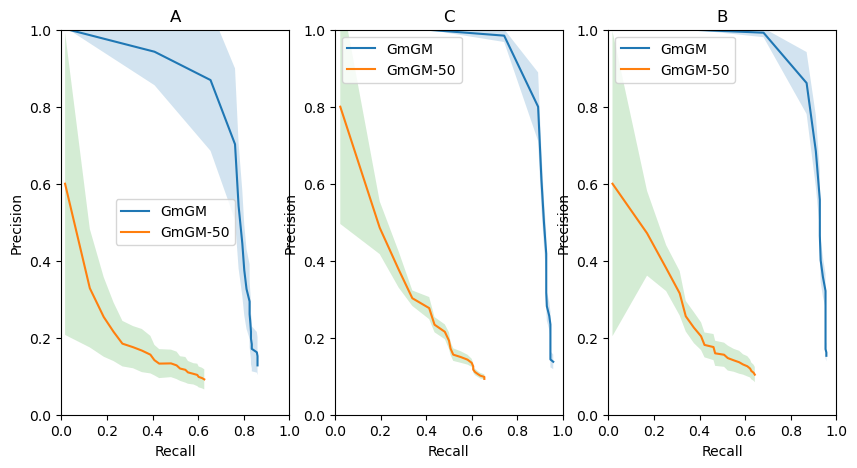

In [20]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


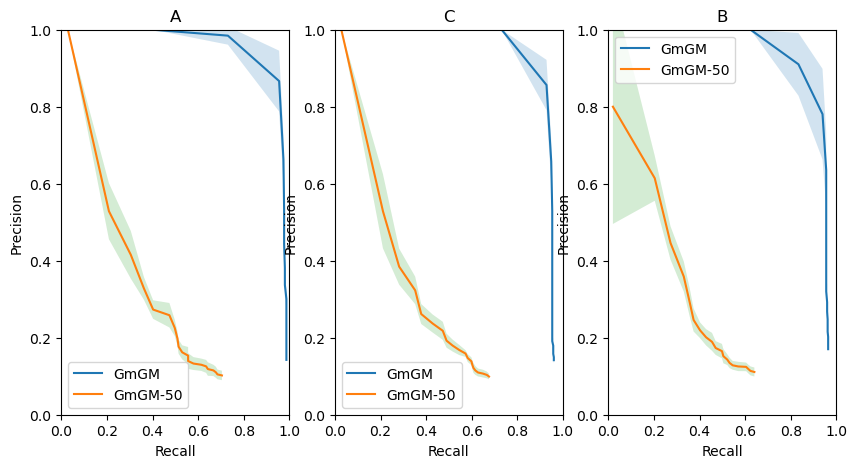

In [21]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Five: Non-normal data

The col-weighting method is the only one that works on non-normal data, it seems.

In [22]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


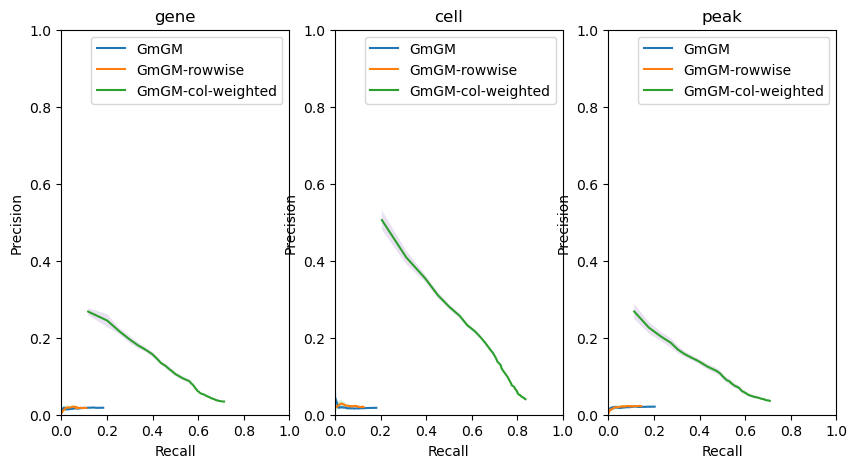

In [23]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


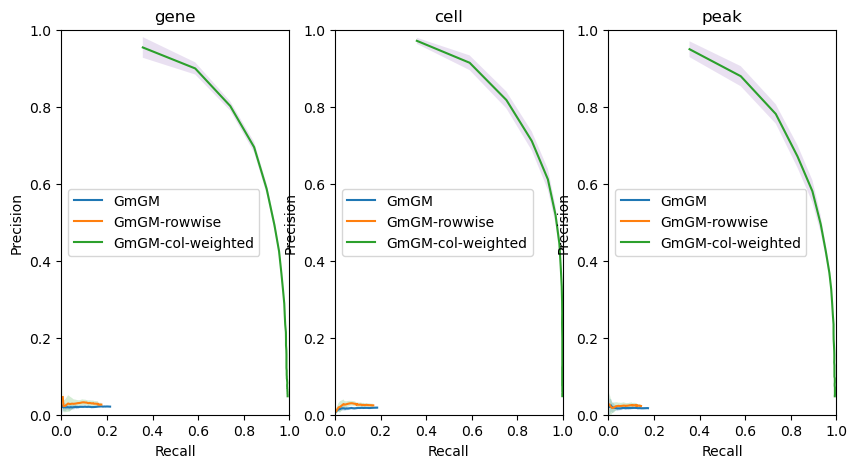

In [24]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Six: Non-normal data, n_comps << size

**On non-normal data, the pricipal components approximation seems to do better than without it!!** (At least in some regimes)

In [25]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


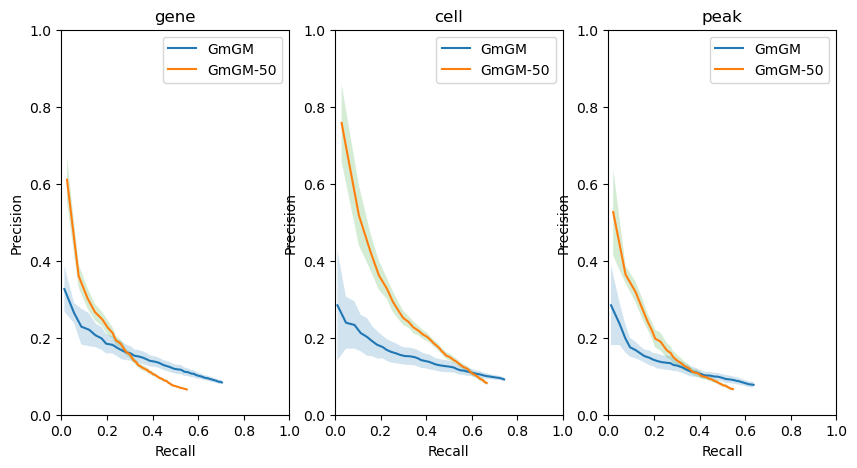

In [26]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


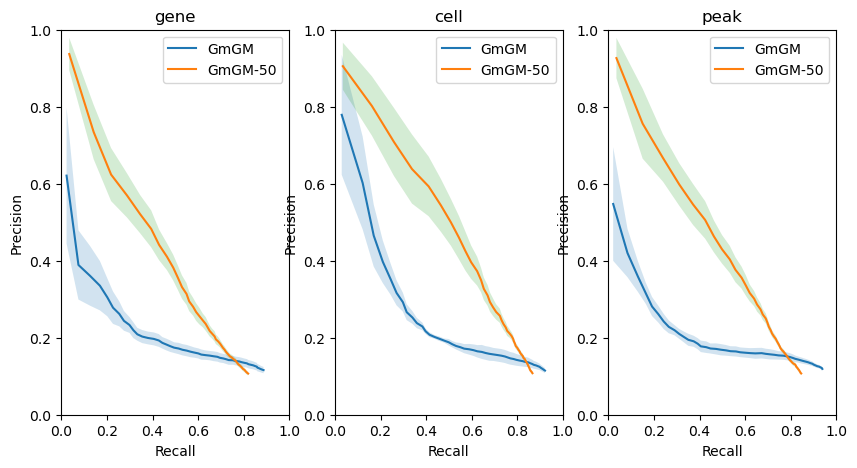

In [27]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Seven: Non-normal tensor data

In [28]:
generator = DatasetGenerator(
    structure={
        "tensor": ("A", "B", "C"),
    },
    generator={
        "A": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "B": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "C": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "A": 50,
        "B": 50,
        "C": 50
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	tensor: ('', 'A', 'B', 'C')
size=
	A: 50
	B: 50
	C: 50
generator=
	A: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	B: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	C: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	tensor: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


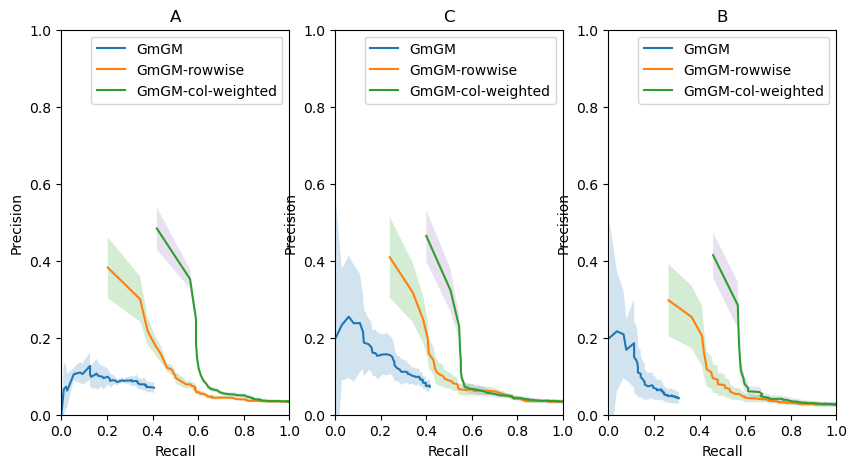

In [29]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


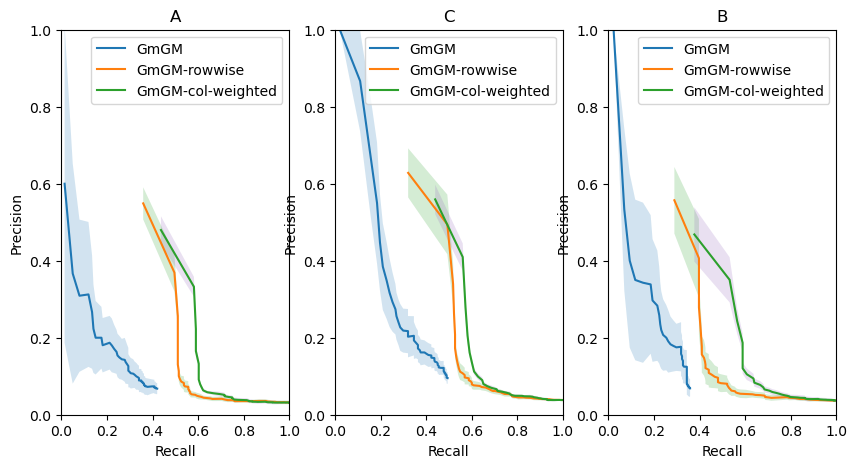

In [30]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


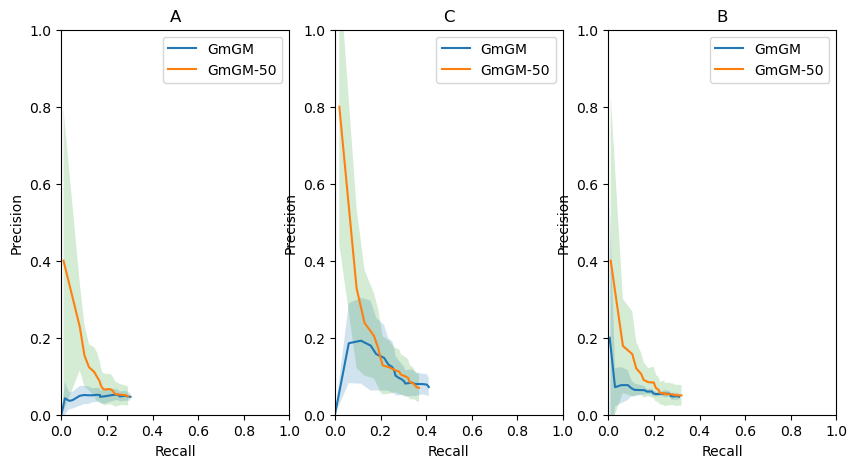

In [31]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


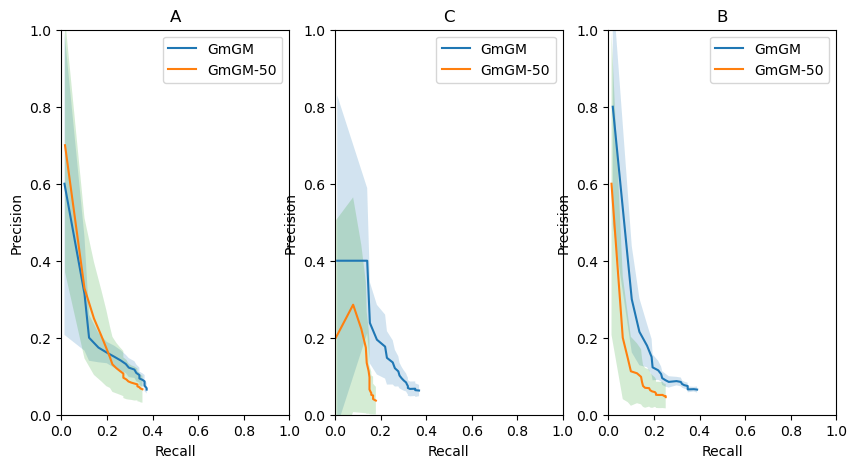

In [32]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=20),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Eight: Zero-Inflated

In [33]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(200)).reshape(1, 200))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.61431116 0.04184074 0.87013215 0.72456996 0.21468474 0.65455584
  0.30738348 0.05881067 0.14774824 0.10206223 0.02777325 0.50850767
  0.94613319 0.2328189  0.83944678 0.12978569 0.80245871 0.43039001
  0.60434117 0.87838256 0.35737822 0.64203079 0.98440735 0.95428098
  0.00300279 0.07631079 0.96422898 0.35582529 0.21468151 0.74237701
  0.10600864 0.29701083 0.37373012 0.18671479 0.3285091  0.85198097
  0.3169638  0.48427444 0.05656598 0.80882845 0.95840699 0.74266591
  0.16394383 0.39555542 0.6

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


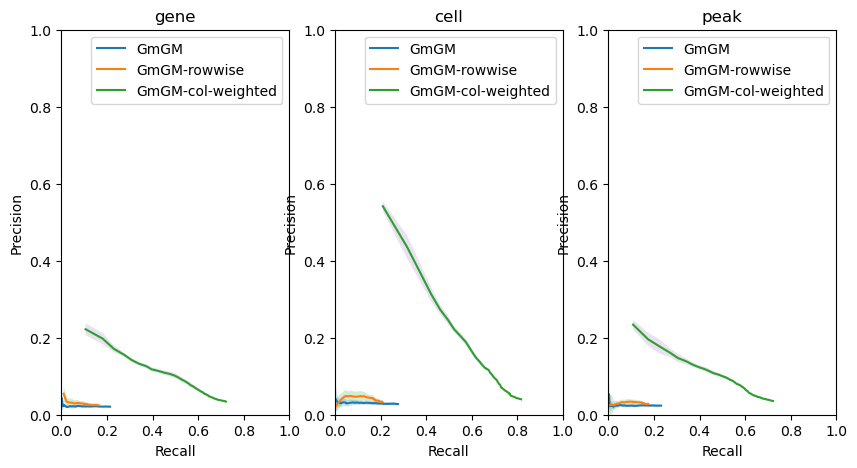

In [34]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


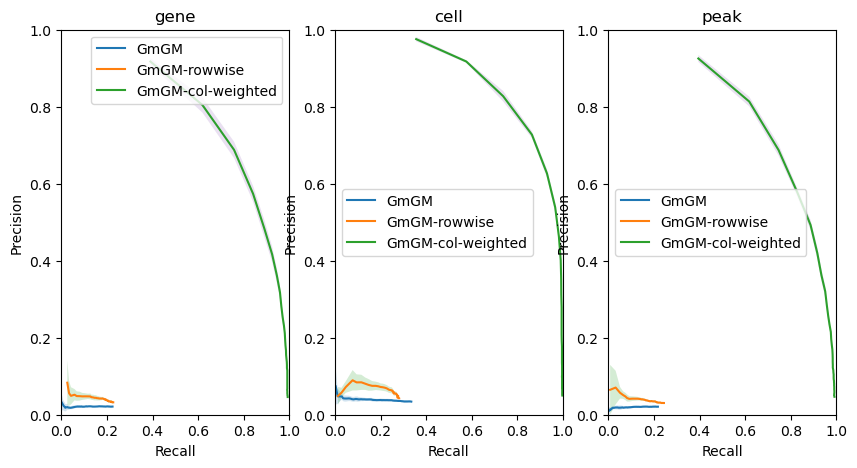

In [36]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


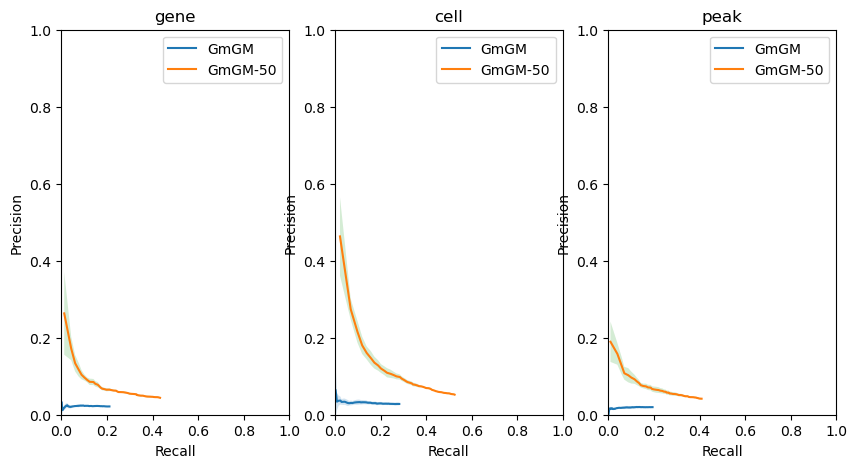

In [37]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


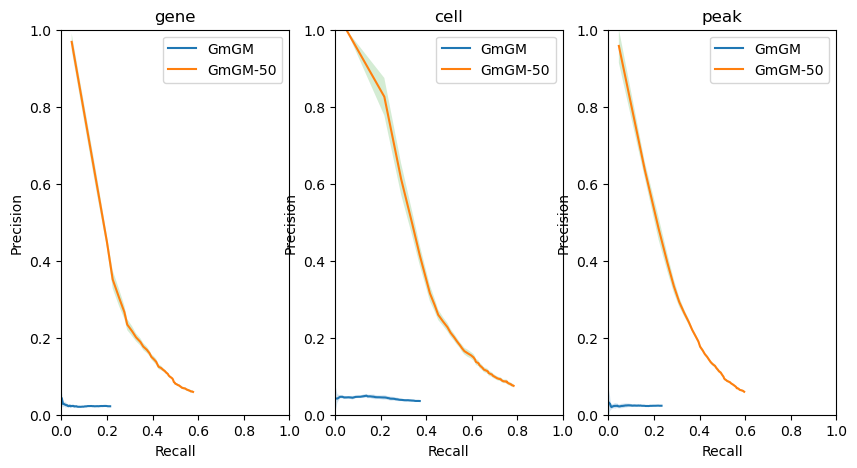

In [39]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


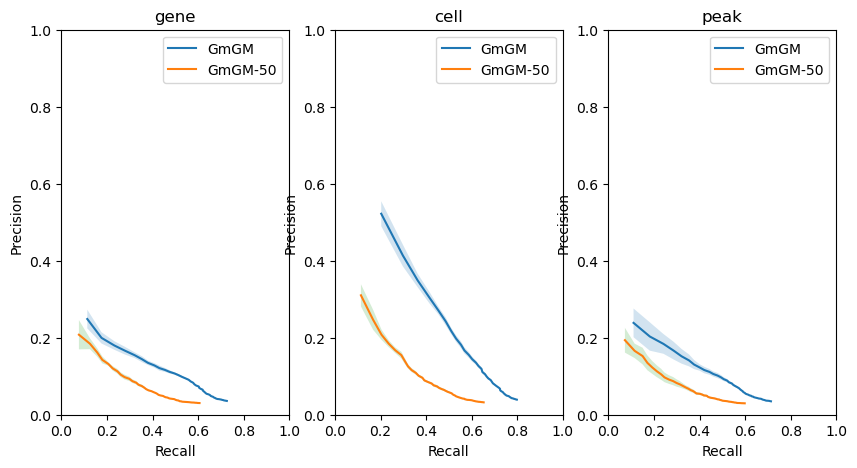

In [40]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


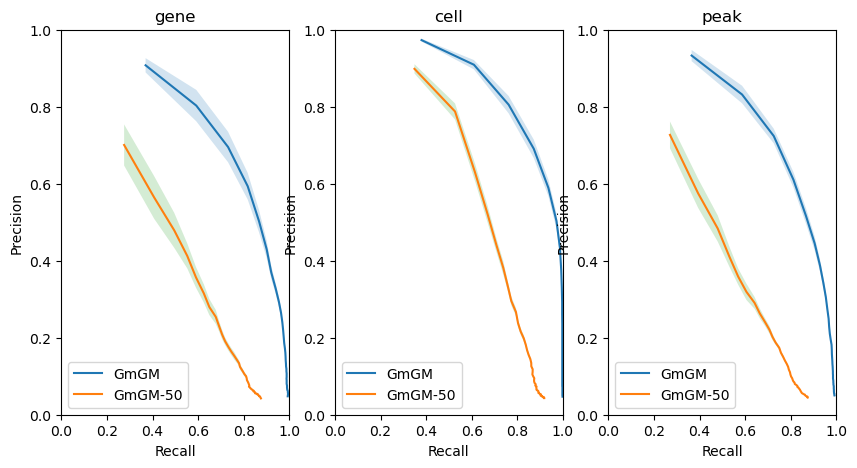

In [41]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

## Experiment Nine: Zero-Inflated, Low n_comps

In [42]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(200)).reshape(1, 200))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.72219593 0.24074955 0.29279472 0.4188255  0.46725896 0.76177679
  0.02928692 0.61487807 0.12103001 0.94701979 0.7217727  0.71757874
  0.20073818 0.51076611 0.35865173 0.2056497  0.06074712 0.18845125
  0.985042   0.67334715 0.88387734 0.68142716 0.82656662 0.27977692
  0.71581393 0.87873627 0.20045586 0.49492046 0.22802539 0.65799461
  0.01308202 0.77480954 0.92803845 0.55663646 0.34583654 0.76696036
  0.84757181 0.65856423 0.11753784 0.30964184 0.48833708 0.

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


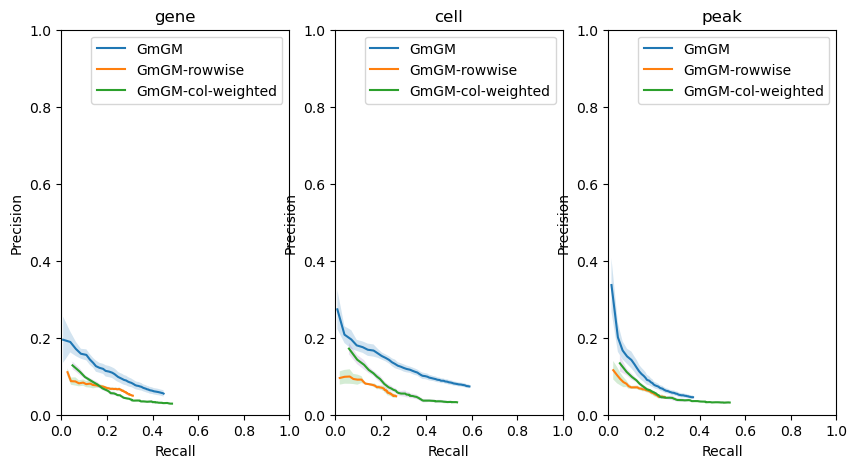

In [43]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


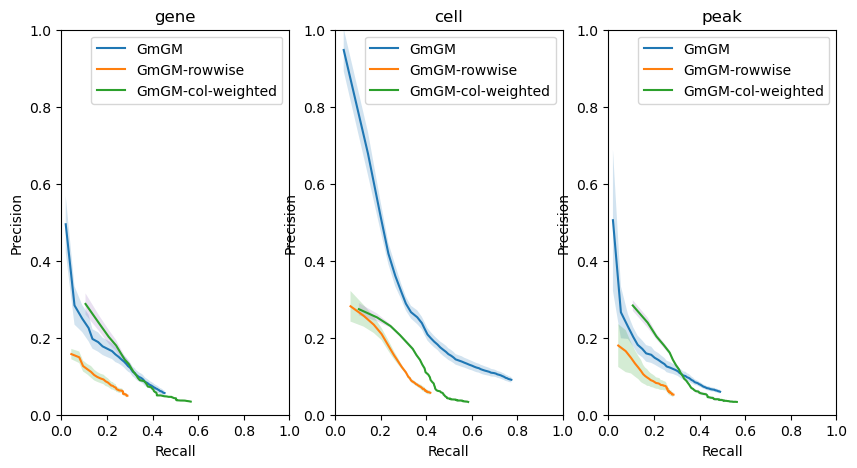

In [44]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


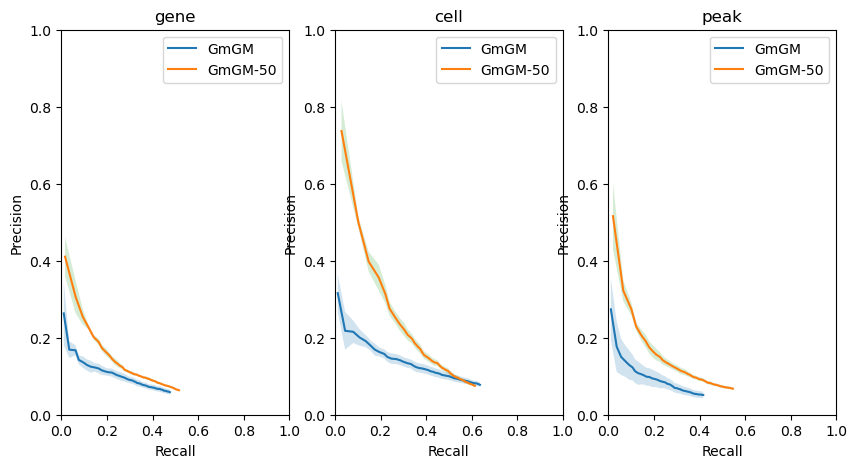

In [45]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


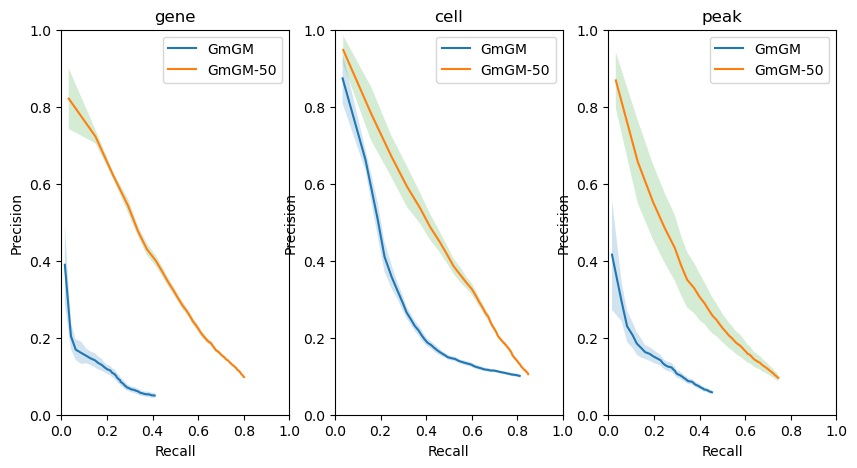

In [46]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-50": np.linspace(0.001, 0.2, 50)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


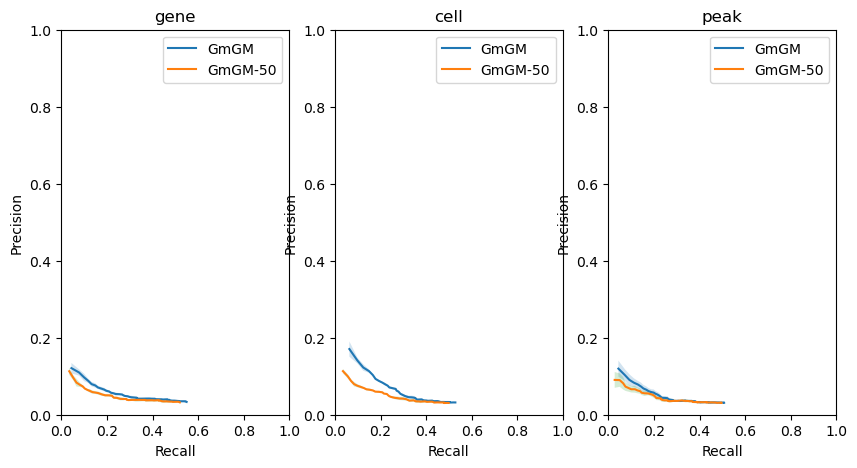

In [47]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


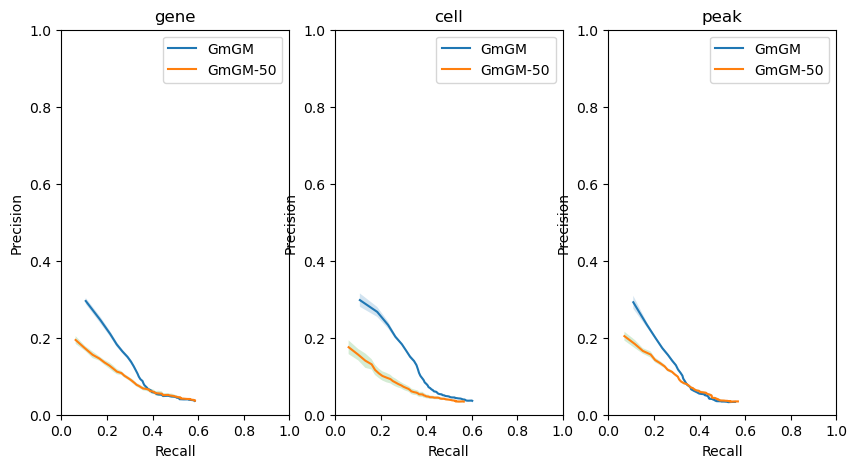

In [48]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", n_comps=50),
    },
    Lambdas={
        "GmGM": np.arange(1, 51),
        "GmGM-50": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

# Nonparanormal Experiments

## Experiment Ten: Normal; Nonparanormal Skeptic

In [10]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution="Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

Attempt 1/5


Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


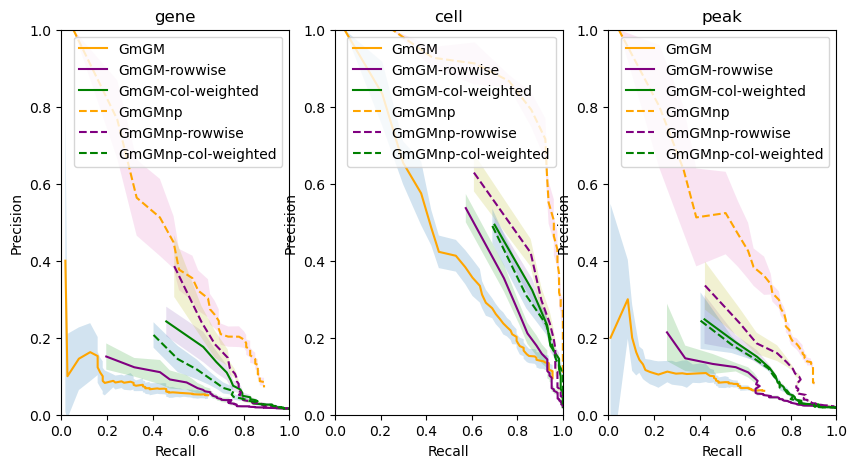

In [11]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


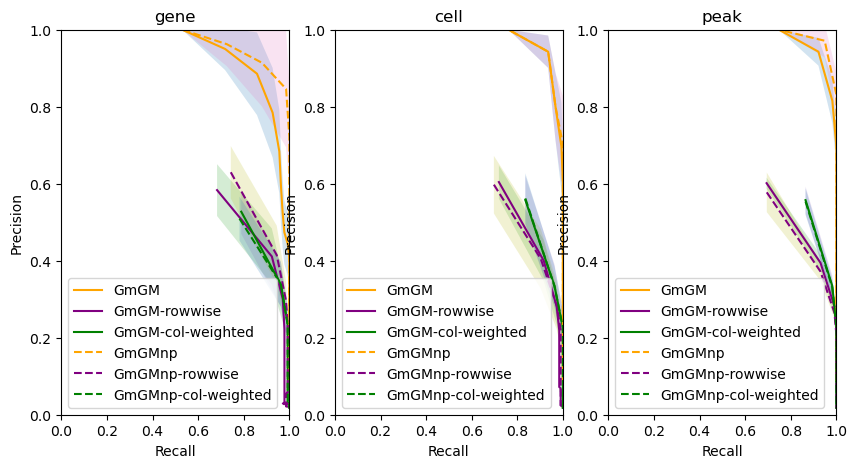

In [12]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

## Experiment Eleven: Nonpara, nonnormal

In [13]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


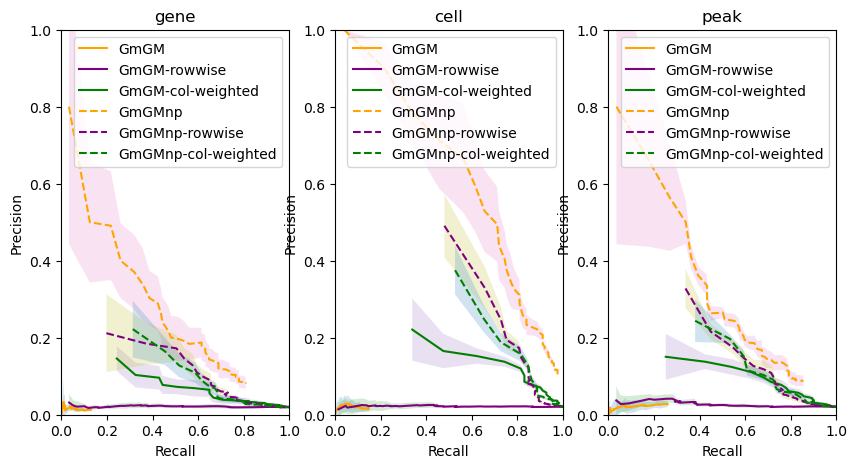

In [14]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


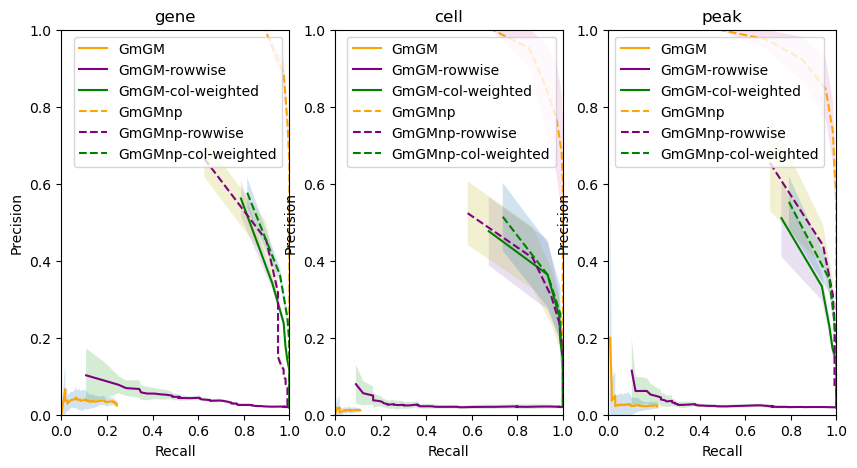

In [15]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

## Experiment Twelve: Nonparanormal, zero-inflated

In [16]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(50)).reshape(1, 50))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.92151924 0.62540564 0.47444894 0.77695411 0.69506059 0.72498653
  0.40588104 0.66071387 0.08476578 0.56119826 0.06546914 0.69563839
  0.13777381 0.24077856 0.54831495 0.68721249 0.20075247 0.83334565
  0.59845341 0.54493666 0.69394696 0.05207893 0.33935283 0.62346713
  0.85583091 0.36488804 0.9641656  0.72922268 0.70579575 0.11623801
  0.53496222 0.37957437 0.09083652 0.14548016 0.09068694 0.41656571
  0.83089431 0.66384485 0.73458907 0.94938692 0.59527706 0.68790659
  0.73349858 0.32786857 0.0226

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


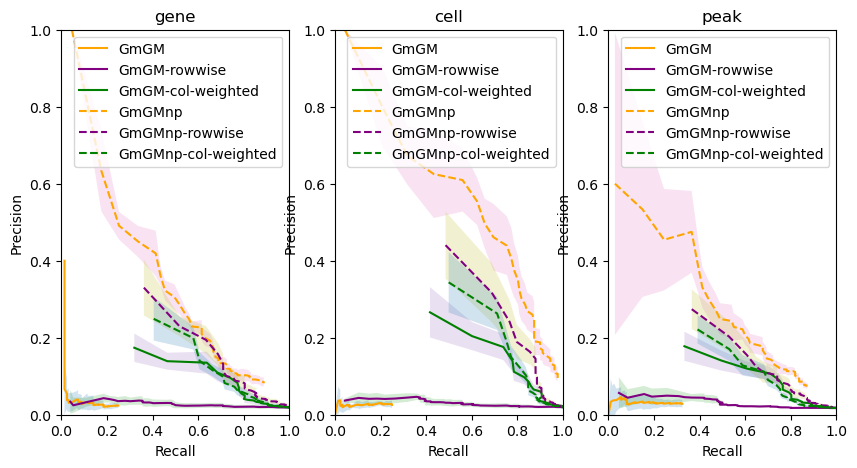

In [17]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


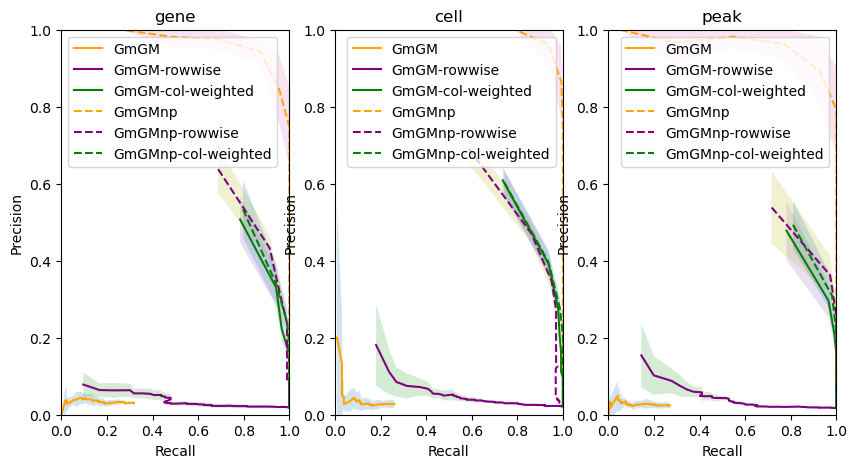

In [18]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

## Experiment Thirteen: Nonparanormal, Ziln-multinomial

Takeaways: `clr-prost` centering with `nonparanormal` and `overall` thresholding does best if interested in the main axis.  If interested in other axes, do terribly - but `rowwise-col-weighted` can recover some performance.  This is no surprise as the model generates the multinomial variables independently, thus making us loose the cell axis.  `rowwise-col-weighted` doing better than random is surprising.

In [33]:
from GmGM.synthetic import ZiLNMultinomial
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 50,
        "gene": 50,
        "peak": 50
    },
    distribution=ZiLNMultinomial(
        np.random.uniform(size=(50)),
        np.random.randint(1, 200, size=(50))
    )
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 50
	gene: 50
	peak: 50
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Multinomial, truncation=[0.92610757 0.25922554 0.10098066 0.14552745 0.49011999 0.90361651
 0.20334307 0.85265462 0.82329129 0.30411343 0.767293   0.37819346
 0.16754223 0.07993375 0.62841553 0.78636433 0.1213101  0.55294719
 0.21707641 0.26492754 0.73367692 0.09777059 0.54792891 0.95023437
 0.99877098 0.34777718 0.88561247 0.05298013 0.92091277 0.73502618
 0.54339813 0.87067332 0.20441271 0.35997916 0.75181906 0.70438352
 0.4008697  0.5682913  0.38344022 0.90054824 0.10648405 0.63276256
 0.52375902 0.74648088 0.09749585 0.33

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


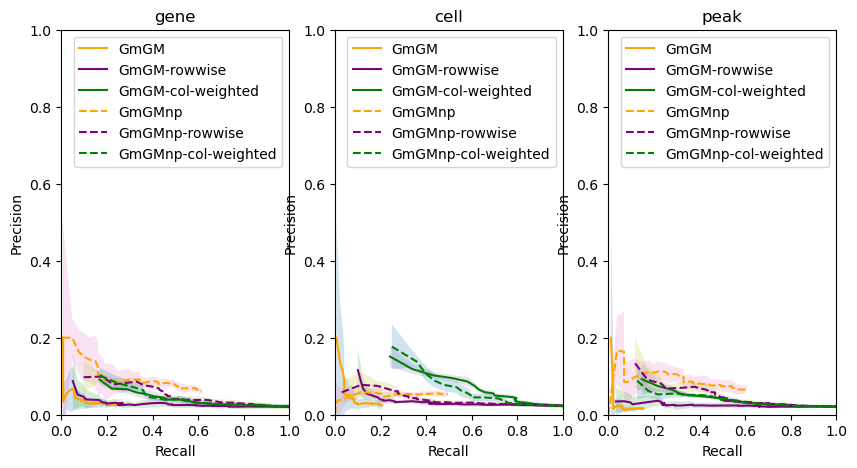

In [34]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


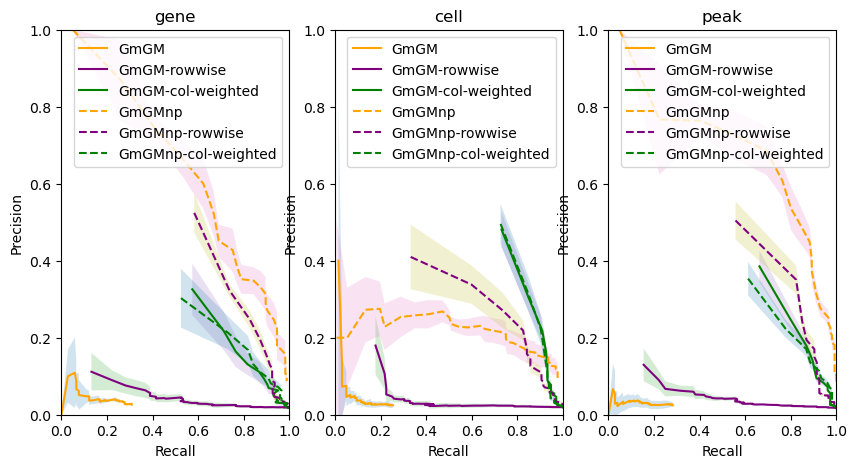

In [35]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True)
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


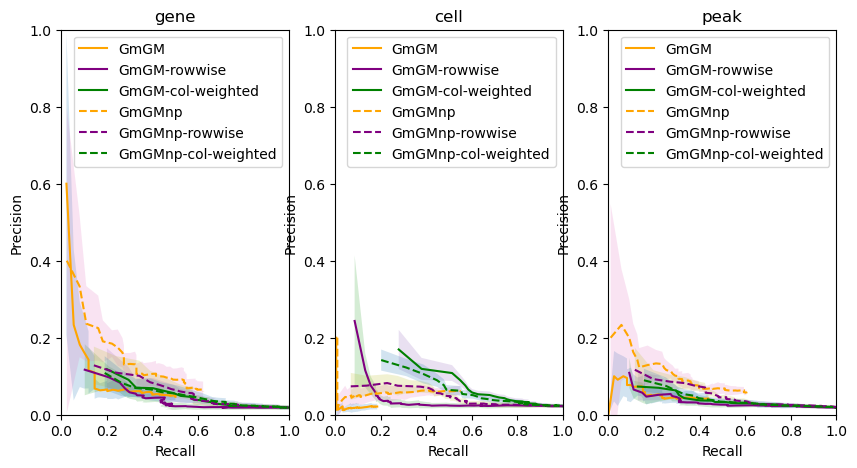

In [36]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", centering_method="clr-prost"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", centering_method="clr-prost"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True, centering_method="clr-prost")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


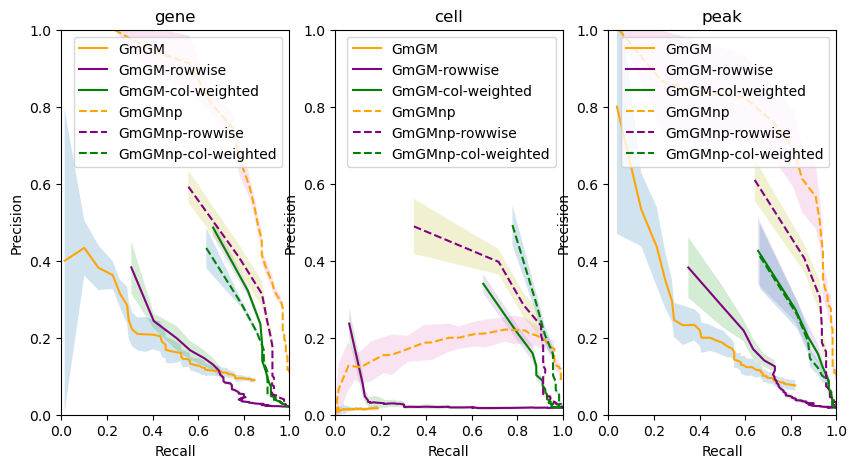

In [37]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", centering_method="clr-prost"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", centering_method="clr-prost"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise", use_nonparanormal_skeptic=True, centering_method="clr-prost"),
        "GmGMnp-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted", use_nonparanormal_skeptic=True, centering_method="clr-prost")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51),
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-rowwise": np.arange(1, 51),
        "GmGMnp-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-rowwise": "purple",
        "GmGM-col-weighted": "green",
        "GmGMnp": "orange",
        "GmGMnp-rowwise": "purple",
        "GmGMnp-col-weighted": "green"
    },
    linestyle={
        "GmGM": "-",
        "GmGM-rowwise": "-",
        "GmGM-col-weighted": "-",
        "GmGMnp": "--",
        "GmGMnp-rowwise": "--",
        "GmGMnp-col-weighted": "--"
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


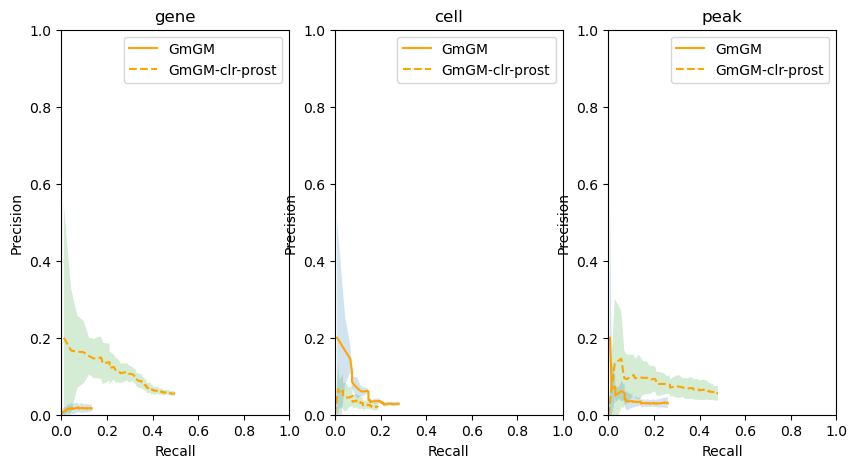

In [42]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-clr-prost": "orange",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-clr-prost": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


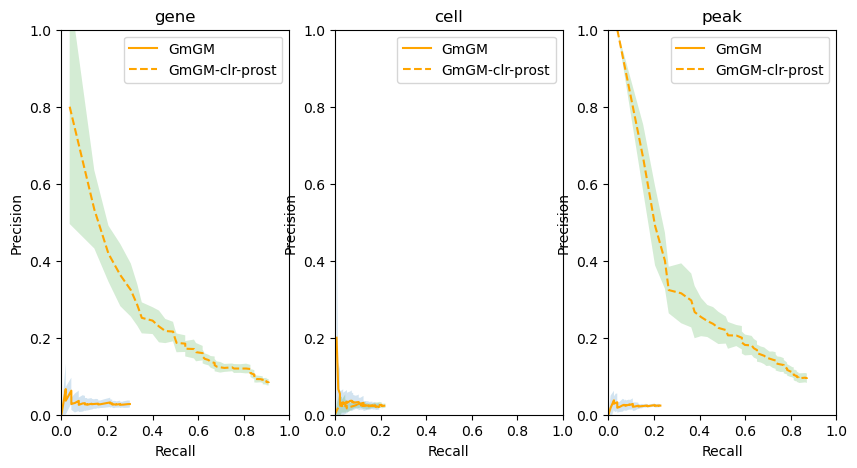

In [43]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost"),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 50),
        "GmGM-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-clr-prost": "orange",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-clr-prost": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


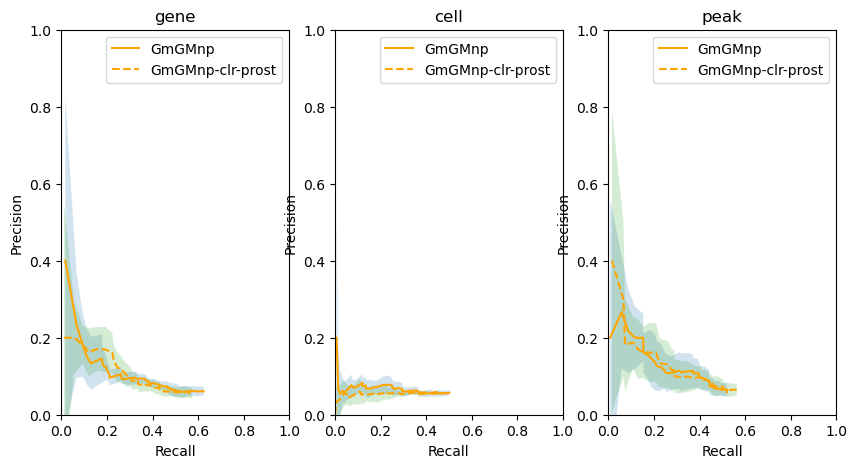

In [44]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost", use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGMnp": "orange",
        "GmGMnp-clr-prost": "orange",
    },
    linestyle={
        "GmGMnp": "-",
        "GmGMnp-clr-prost": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


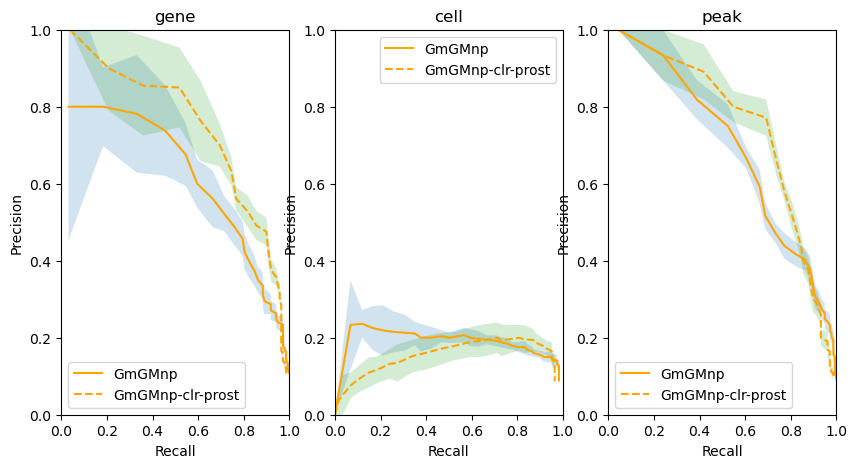

In [45]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGMnp-clr-prost": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", centering_method="clr-prost", use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGMnp": np.linspace(0.001, 0.2, 50),
        "GmGMnp-clr-prost": np.linspace(0.001, 0.2, 50),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGMnp": "orange",
        "GmGMnp-clr-prost": "orange",
    },
    linestyle={
        "GmGMnp": "-",
        "GmGMnp-clr-prost": "--",
    }
)
pass

# Further Tests

## Nonparanormal Skeptic 

In [44]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            n_comps=10
        ),
    },
    size={
        "cell": 200,
        "gene": 200,
        "peak": 200
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(200)).reshape(1, 200))
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 200
	gene: 200
	peak: 200
generator=
	cell: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	gene: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
	peak: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02), n_comps=10>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[0.79294528 0.54380276 0.51975736 0.36816383 0.46796624 0.43315104
  0.6133795  0.59141172 0.7533645  0.33188545 0.70314456 0.69975148
  0.3496778  0.66969738 0.44575563 0.20770481 0.91724039 0.46689155
  0.389985   0.6049209  0.6190153  0.17804141 0.94618906 0.54612882
  0.32999028 0.01607335 0.40831726 0.44402311 0.72379007 0.63532465
  0.68403753 0.2171314  0.17104755 0.21899056 0.41588897 0.33277921
  0.89159203 0.25514749 0.7551319  0.85041328 0.56046779 0.

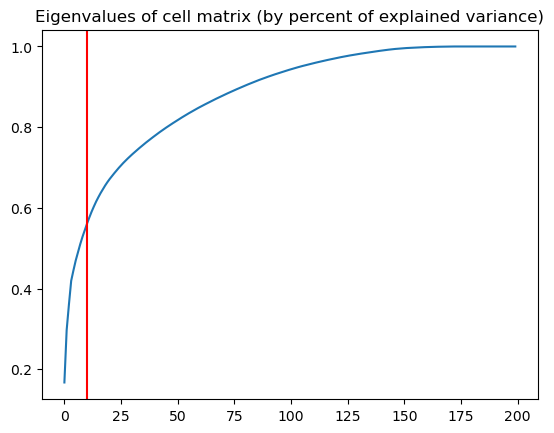

In [45]:
eigs = np.linalg.eigh(generator.Psis["cell"])[0][::-1]
eigs[eigs < 0] = 0
plt.plot((eigs/eigs.sum()).cumsum())
plt.axvline(generator.generator["cell"].n_comps, color="red")
plt.title("Eigenvalues of cell matrix (by percent of explained variance)")
pass

Attempt 1/1


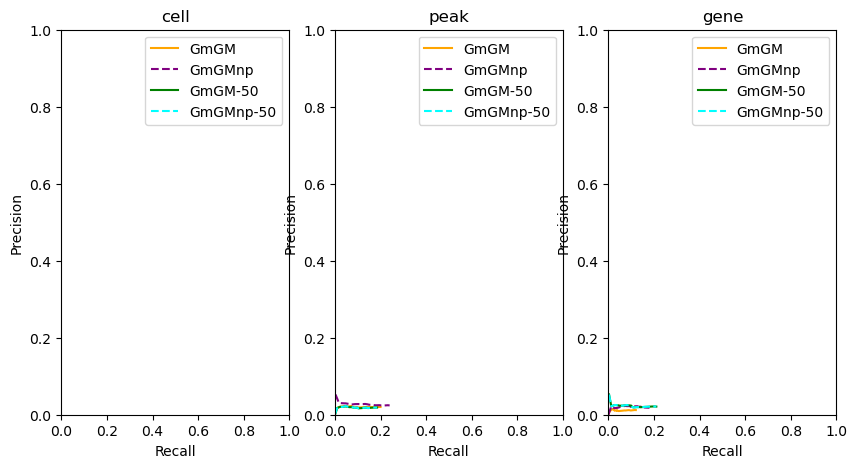

In [41]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
        "GmGMnp-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGMnp": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
        "GmGMnp-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=1,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGMnp": "purple",
        "GmGM-50": "green",
        "GmGMnp-50": "cyan",
    },
    linestyle={
        "GmGM": "-",
        "GmGMnp": "--",
        "GmGM-50": "-",
        "GmGMnp-50": "--",
    }
)
pass

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


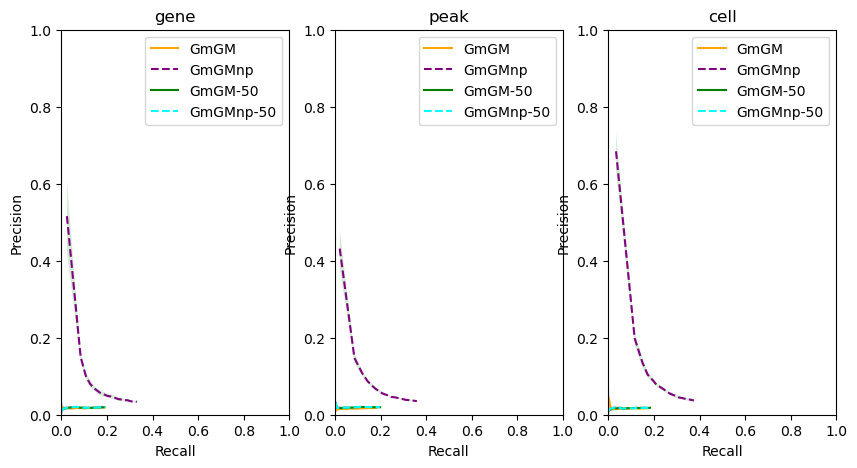

In [5]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGMnp": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "GmGM-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", n_comps=50),
        "GmGMnp-50": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True, n_comps=50),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, 20),
        "GmGMnp": np.linspace(0.001, 0.2, 20),
        "GmGM-50": np.linspace(0.001, 0.2, 20),
        "GmGMnp-50": np.linspace(0.001, 0.2, 20),
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGMnp": "purple",
        "GmGM-50": "green",
        "GmGMnp-50": "cyan",
    },
    linestyle={
        "GmGM": "-",
        "GmGMnp": "--",
        "GmGM-50": "-",
        "GmGMnp-50": "--",
    }
)
pass